In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [2]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\EastWestAirlines.csv")

In [3]:
df.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


### EDA

In [4]:
# droping the id column

In [5]:
df.drop(columns=['ID#'],inplace=True)

In [6]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [7]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [8]:
# Taking Important column

In [9]:
data=df.loc[:,['Balance','Flight_miles_12mo','Days_since_enroll','Bonus_miles']]

In [10]:
data.head()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
0,28143,0,7000,174
1,19244,0,6968,215
2,41354,0,7034,4123
3,14776,0,6952,500
4,97752,2077,6935,43300


In [11]:
data.describe()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
count,3.999000e+03,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,460.055764,4118.55939,17144.846212
std,1.007757e+05,1400.209171,2065.13454,24150.967826
min,0.000000e+00,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,2330.00000,1250.000000
50%,4.309700e+04,0.000000,4096.00000,7171.000000
75%,9.240400e+04,311.000000,5790.50000,23800.500000
max,1.704838e+06,30817.000000,8296.00000,263685.000000


### Feature Scaling

In [12]:
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-4.51140783e-01, -3.28603258e-01,  1.39545434e+00,
        -7.02786266e-01],
       [-5.39456874e-01, -3.28603258e-01,  1.37995704e+00,
        -7.01088399e-01],
       [-3.20031232e-01, -3.28603258e-01,  1.41192021e+00,
        -5.39252702e-01],
       ...,
       [-4.29480975e-05, -3.28603258e-01, -1.31560393e+00,
         3.43803696e-01],
       [-1.85606976e-01,  2.85309024e-02, -1.31608822e+00,
        -6.89286154e-01],
       [-7.00507951e-01, -3.28603258e-01, -1.31754109e+00,
        -7.09991847e-01]])

### Model building

In [13]:
db=DBSCAN()
y=db.fit_predict(x)

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(x,y)

0.13097974261021791

### Hyperparameter tuning

In [16]:
# finding out the best eps value

In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
neigh=NearestNeighbors(n_neighbors=8).fit(x)
dist,ind=neigh.kneighbors(x)

pd.DataFrame(dist)

,0,1,2,3,4,5,6,7
0,0.0,0.040803,0.089682,0.107527,0.112767,0.116441,0.119902,0.120342
1,0.0,0.031989,0.032644,0.046535,0.047298,0.055790,0.064175,0.075592
2,0.0,0.068835,0.128503,0.136186,0.151680,0.157547,0.164378,0.168976
3,0.0,0.026803,0.040204,0.040712,0.046535,0.048375,0.058575,0.063094
4,0.0,0.283503,0.302447,0.352201,0.554369,0.580015,0.596254,0.671893
...,...,...,...,...,...,...,...,...
3994,0.0,0.165713,0.172714,0.179439,0.186222,0.188867,0.194775,0.195355
3995,0.0,0.070744,0.076259,0.103799,0.109805,0.134637,0.171378,0.181587
3996,0.0,0.072085,0.135493,0.166148,0.168356,0.178389,0.211721,0.231110
3997,0.0,0.174071,0.201812,0.203540,0.247102,0.254843,0.257255,0.257930


In [19]:
# sort the first column

In [20]:
distance=np.sort(dist[:,1],axis=0)
distance

array([0.00000000e+00, 0.00000000e+00, 1.88561158e-03, ...,
       4.73250617e+00, 5.17636410e+00, 6.43737063e+00])

In [21]:
# plot a line chart of distance

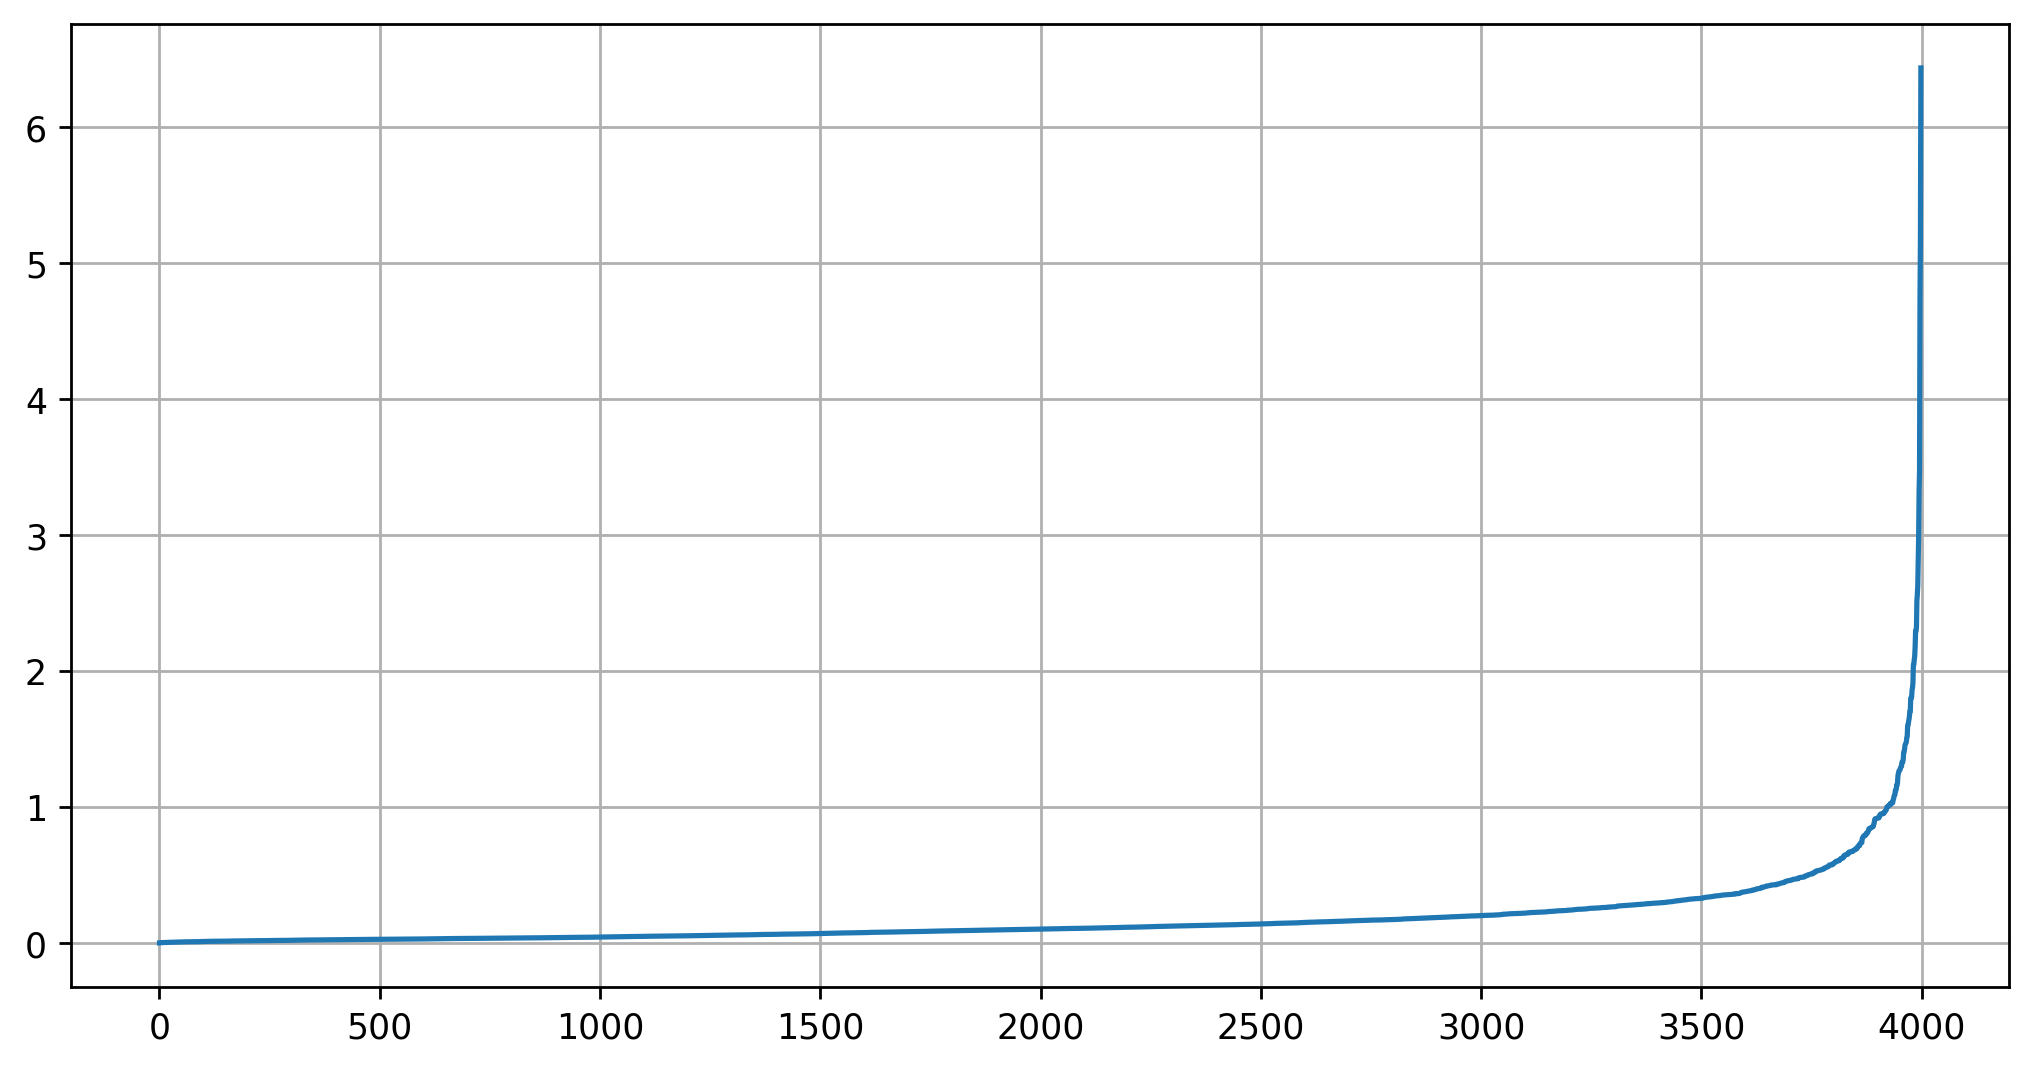

In [23]:
plt.plot(distance)
plt.grid()

## create Another Model

In [24]:
db=DBSCAN(eps=1,min_samples=8)
y=db.fit_predict(x)

In [25]:
silhouette_score(x,y)

0.6716089749884601

In [27]:
data['cluster']=y

### Visualize DBSCAN

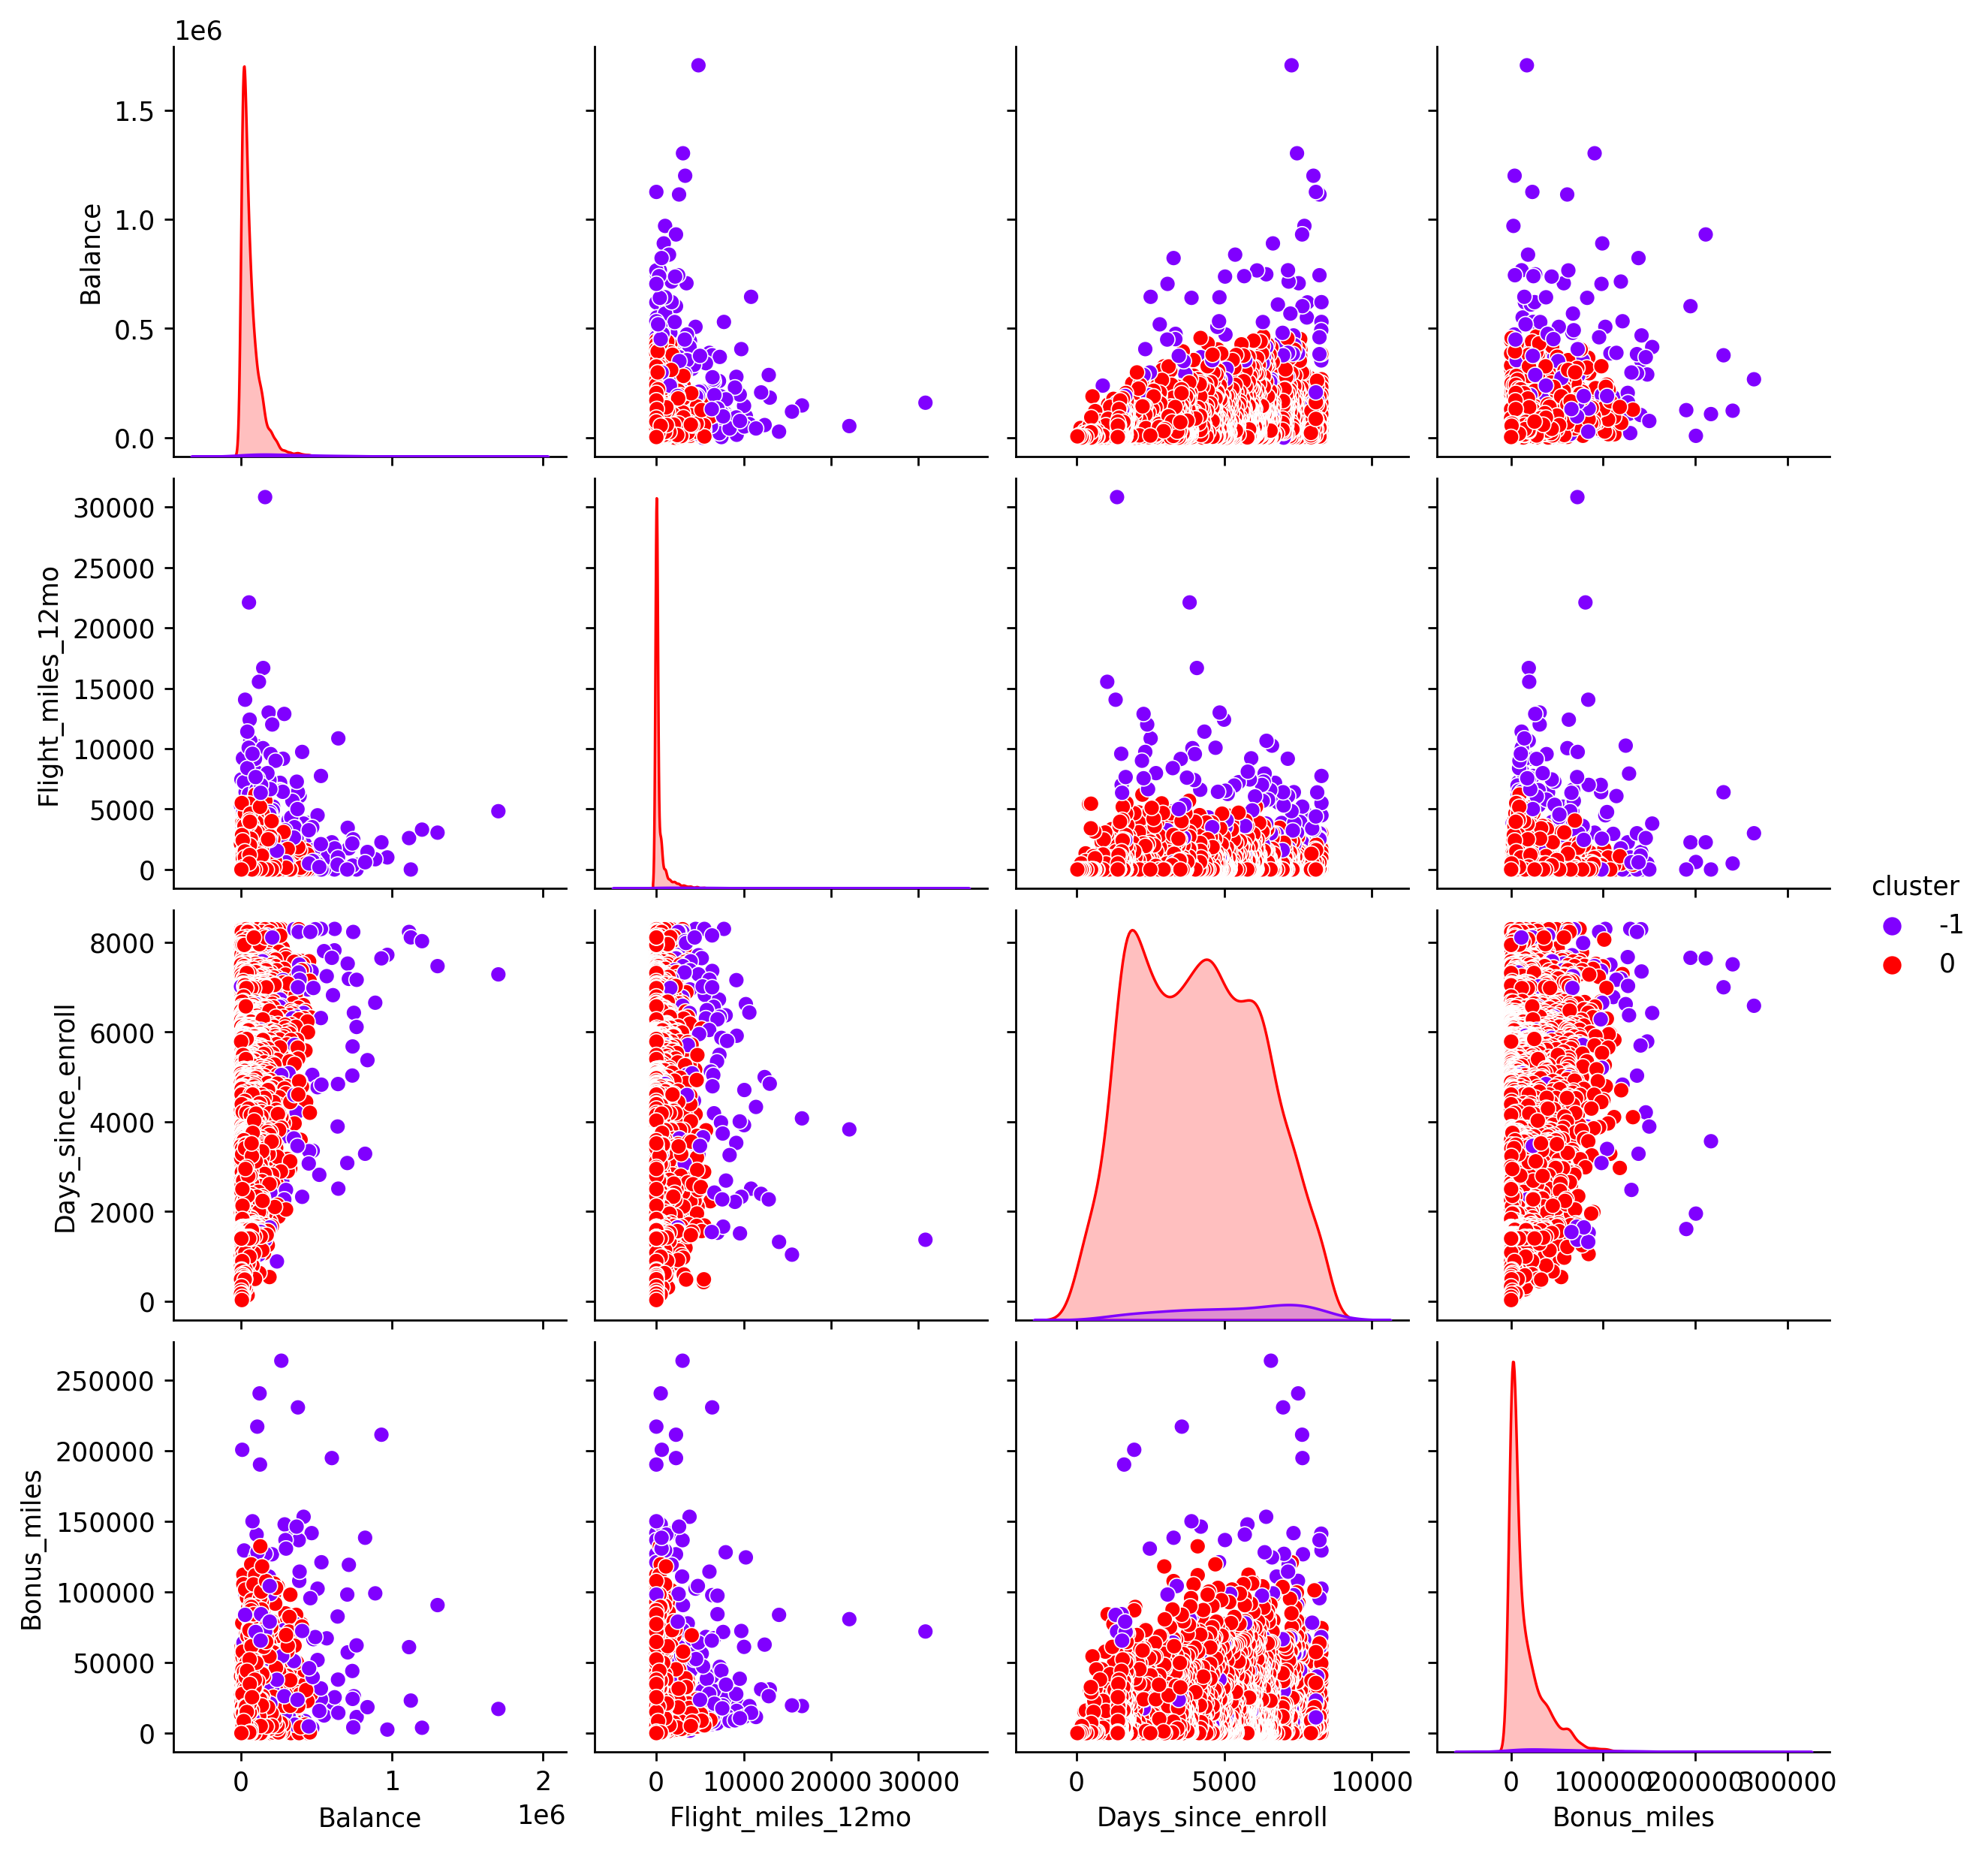

In [28]:
sb.pairplot(data,hue='cluster',palette='rainbow')

In [29]:
# plotting for seperate column

<AxesSubplot:xlabel='Balance', ylabel='Flight_miles_12mo'>

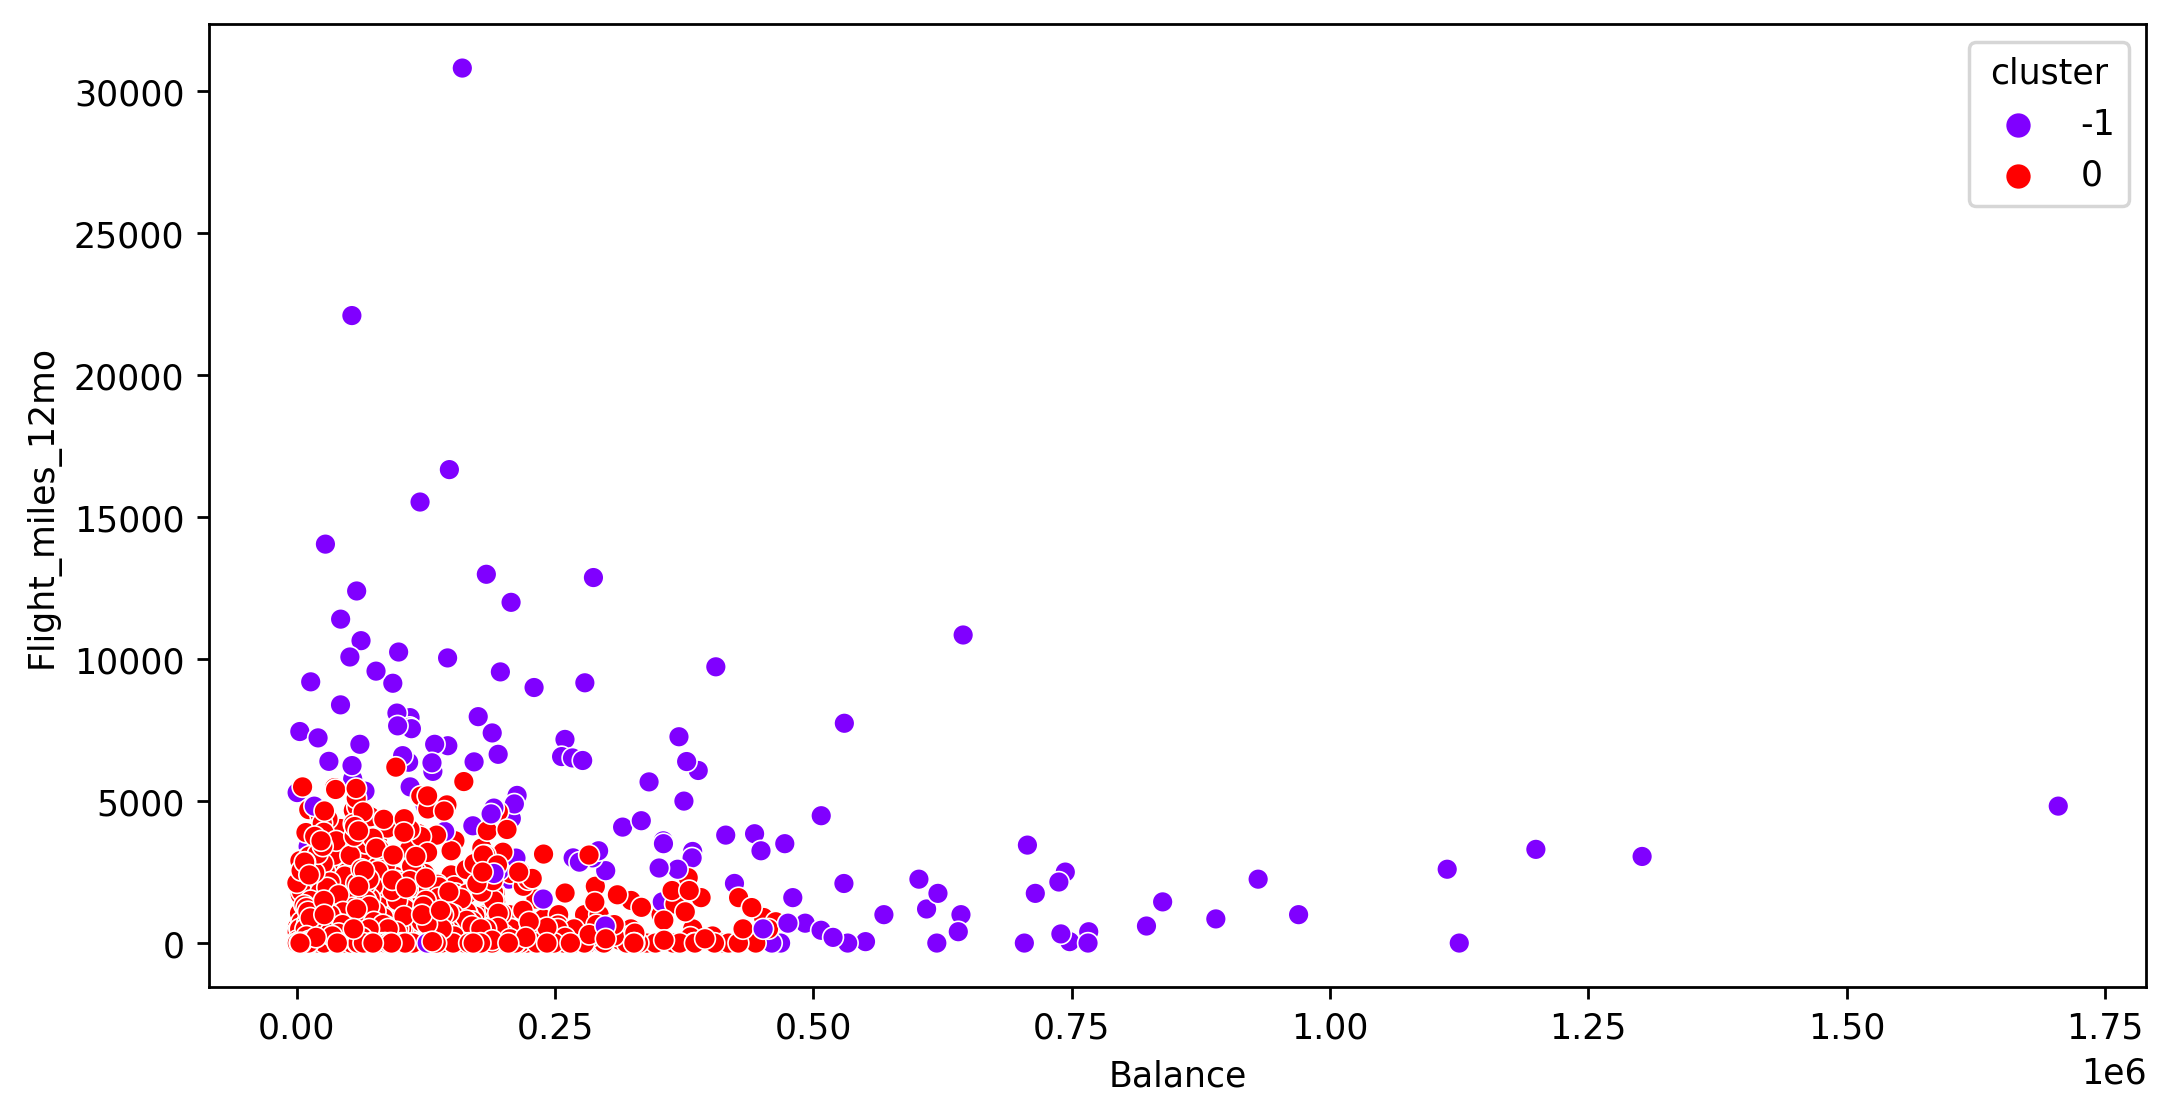

In [30]:
sb.scatterplot(data['Balance'],data['Flight_miles_12mo'],hue=data['cluster'],palette='rainbow')